In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sympy import symbols, diff, solve

# One hot encoding para categorías de productos

In [ ]:
# Creamos una lista de las ditintas categorias del almacén
categorias = ['Electrónica','Ropa','Hogar','Deportes','Alimentación','Juguetes']

# La lista de ventas
ventas = [
    ['Ropa','Hogar'],
    ['Hogar','Deportes','Alimentación'],
    ['Juguetes','Electrónica','Ropa'],
    ['Deportes']
]

# Creamos una matriz de zeros con tantas filas como ventas y columnas como categorias
matriz_one_hot = np.zeros((len(ventas), len(categorias)))

# Recorremos la lista de ventas
for i, ticket in enumerate(ventas):
  # Para cada ticket recorremos las secciones donde se compró
  for seccion in ticket:
    # Consultamos la posición que ocupa la sección en la lista de categorías
    idx_cat = categorias.index(seccion)
    # Poner a 1 la posición correspondiente
    matriz_one_hot[i,idx_cat] = 1
df_ventas = pd.DataFrame(matriz_one_hot, columns=categorias)
df_ventas

,Electrónica,Ropa,Hogar,Deportes,Alimentación,Juguetes
0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0


# Tratamiento de imágenes

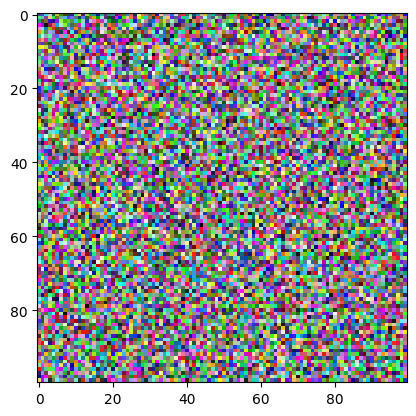

In [ ]:
# Generar una imagen aleatoria
imagen = np.random.randint(0, 256, size=(100,100,3))
plt.imshow(imagen)

38.85740740740741 183.52897603485837 224.90343137254902


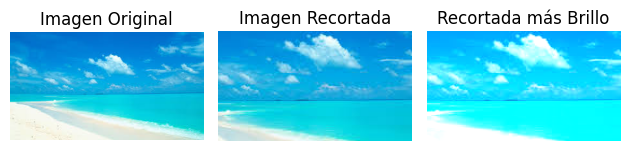

In [ ]:
# Cargamos la imagen y obtenemos las dimensiones de la misma
imagen = np.array(Image.open('/content/images.jpeg'))
alto, ancho, _ = imagen.shape

# Calculamos el total de pixeles que tenemos que quitar para el crop del 20%
margen_alto = int(alto*0.2)
margen_ancho = int(ancho*0.2)

# Una vez sabemos el total de pixeles a eliminar localizamos las coordenadas donde vamos a recortar la imagen
y1 = margen_alto# Donde vamos a cortar desde arriba
y2 = alto-margen_alto
x1 = margen_ancho
x2 = ancho-margen_ancho

# Recortamos la imagen
imagen_recortada = imagen[y1:y2,x1:x2]

# Incrementar el brillo de la imagen recortada en un 30%
aumento_brillo = 1.3
imagen_con_brillo = np.clip(imagen_recortada * aumento_brillo, 0, 255).astype(np.uint8)

# Promerio de color de la imagen RGB
rojo = np.mean(imagen_recortada[:,:,0])
verde = np.mean(imagen_recortada[:,:,1])
azul = np.mean(imagen_recortada[:,:,2])
print(rojo,verde,azul)

plt.subplot(131)
plt.imshow(imagen)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(132)
plt.imshow(imagen_recortada)
plt.title("Imagen Recortada")
plt.axis("off")

# Mostrar la imagen con brillo aumentado
plt.subplot(133)
plt.imshow(imagen_con_brillo)
plt.title("Recortada más Brillo")
plt.axis("off")

# Mostrar las imágenes
plt.tight_layout()
plt.show()


# Derivadas

## Encontrar el número de ventas de un producto que maximiza el beneficio obtenido

In [ ]:
# Definimos la variable simbólica q (cantidad de unidades)
q = symbols('q')

# Definimos la función de costo total de producción C(q) = Costes fijos + Costes variables + Otros costos (almacenamiento, impuestos, seguros, etc.)
costo_total = 50 + 10*q + 10*q**2

# Definimos la función de ingresos totales R(q) = 150€ por unidad vendida
ingresos_totales = 150*q

# Calculamos la función de beneficios B(q) = R(q) - C(q)
beneficios = ingresos_totales - costo_total
print('Función de beneficios:')
beneficios

Función de beneficios:


-10*q**2 + 140*q - 50

El objetivo principal es encontrar la cantidad optima de q (la cantidad de porductos a producir y vender) con el fin de maximizar el beneficio obtenido.

Utilizamos las derivadas para conocer aquellos puntos en los que la función de los beneficios de de crecer/decrecer (puntos críticos)

In [ ]:
# Calculamos la derivada de B(q) con respecto a q
derivada_beneficios = diff(beneficios, q)
derivada_beneficios

140 - 20*q

In [ ]:
puntos_criticos = solve(derivada_beneficios,q)
puntos_criticos

[7]

In [ ]:
beneficios.subs(q,7)

440

In [ ]:
# Para el eje x de nuestro gráfico generamos varios valorees de q entre 0 y 10
q_valores = np.linspace(0,10,400)

valores_beneficios = [beneficios.subs(q,q_valor) for q_valor in q_valores]

valores_derivada = [derivada_beneficios.subs(q,q_valor) for q_valor in q_valores]

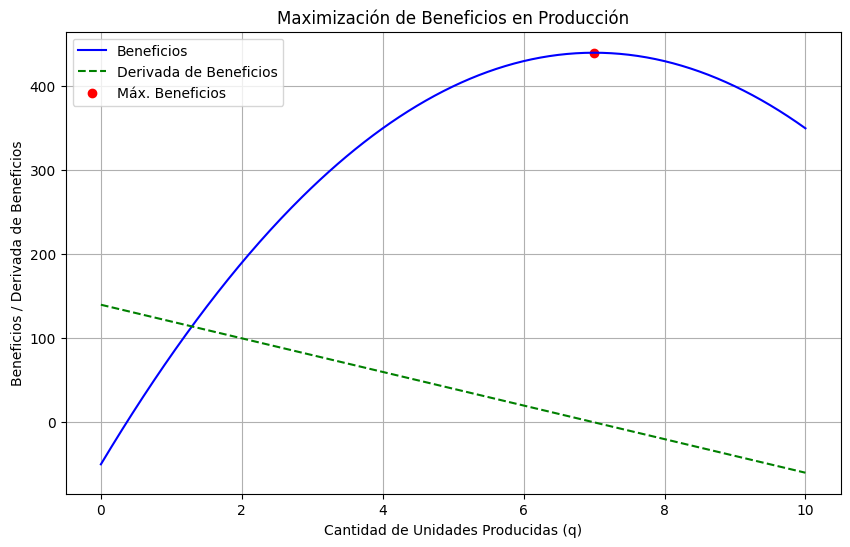

In [ ]:
# Crear el gráfico de beneficios en función de la cantidad de unidades producidas y su derivada
plt.figure(figsize=(10, 6))
plt.plot(q_valores, valores_beneficios, label='Beneficios', color='b')
plt.plot(q_valores, valores_derivada, label='Derivada de Beneficios', color='g', linestyle='--')
plt.scatter(7, 440, color='r', label='Máx. Beneficios')
plt.title("Maximización de Beneficios en Producción")
plt.xlabel("Cantidad de Unidades Producidas (q)")
plt.ylabel("Beneficios / Derivada de Beneficios")
plt.grid(True)
plt.legend()
plt.show()

# Integrales

<img src=https://static.wixstatic.com/media/8f76ac_3b8c7caafb1a41749d7794ade1f46652~mv2.jpg/v1/fill/w_1357,h_1018,al_c,q_90/8f76ac_3b8c7caafb1a41749d7794ade1f46652~mv2.webp>

In [ ]:
# Definimos nuestra curva
def f(x):
    return x**2

# Definimos el intervalo enel que vamos a representar la curva
a = 0
b = 2
n = 100 # Total de segmentos en el que vamos a "romper el área con las tijeras"

# Calculamos la anchura de cada segmento (longitud total entre el total de segmentos)
dx = (b-a)/n

area_aprox = 0

# Iterar sobre todos los segmentos
for i in range(n):
  # Calcular el punto inicial de cada segmento (0, 10, 20,30 )
  x_i = a + i*dx
  # Calculo del punto medio del segmento
  x_mid = x_i + dx/2
  # Calcular la altura del punto medio del segmento
  altura_mid = f(x_mid)
  # Calcular el area aprox del segmento
  area_segmento = altura_mid*dx
  # Actualizar el area aproximada
  area_aprox+=area_segmento
area_aprox

2.6666000000000003

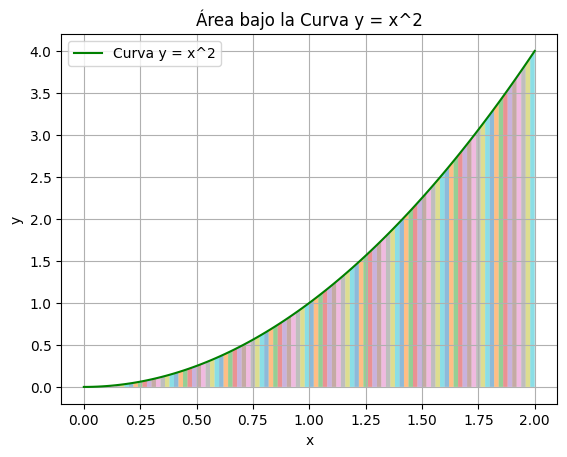

In [ ]:
# Crear un rango de valores x para graficar la curva
x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

# Crear una figura para visualizar la curva y los rectángulos
plt.plot(x_vals, y_vals, 'g', label='Curva y = x^2')

# Dibujar los rectángulos
for i in range(n):
    x_i = a + i * dx
    plt.fill_between([x_i, x_i + dx], [f(x_i), f(x_i + dx)], alpha=0.5)

# Configurar el gráfico
plt.title('Área bajo la Curva y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

<img src=https://www.themachinelearners.com/wp-content/uploads/2020/12/roc-curve-v2.png>